# Music Genre Classification Development

In [3]:
###IMPORTS###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
import os
warnings.filterwarnings("ignore")
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dense, Conv1D, Dropout, MaxPool1D, Flatten
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
###CONSTANTS###
data_fn = 'Data/features_3_sec.csv'

# Basic Model

In [8]:
df = pd.read_csv(data_fn)
# df = df.drop
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [9]:
X =df.drop(columns=['length','filename','label'])

In [10]:
y=df['label']
y

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6693, 57)
(6693,)
(3297, 57)
(3297,)


## Baseline Random Classifier

In [13]:
#Initilaie predicted y variables
#loop through len of test sample
#random generator guess one of multiple genres
#add to pritected y
#measured accuracy

In [14]:
# y_test = y_test.to_numpy()
genres = y_test
y_predicted = []
y_predicted = np.array([])
uniquegenres = set(genres)
uniquegenres = np.array(genres)
y_predicted = np.random.choice(uniquegenres,len(y_test))
y_predicted

ac = accuracy_score(y_test, y_predicted)
ac

0.10100090991810737

## Logistic Regression

In [15]:

#KNeighborsClassifier, sklearn.svm.SVC, sklearn.ensemble.RandomForestClassifier¶
 
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



ac = accuracy_score(y_test, y_pred)
print(ac)

0.21777373369730058


## SVM Classifier

In [16]:
from sklearn.svm import SVC

#KNeighborsClassifier, sklearn.svm.SVC, sklearn.ensemble.RandomForestClassifier¶
 
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_predSVC = svc.predict(X_test)



acSVC = accuracy_score(y_test, y_predSVC)
print(acSVC)


0.10433727631179861


## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfcACC = []

#KNeighborsClassifier, sklearn.svm.SVC, sklearn.ensemble.RandomForestClassifier¶
for i in range(1,30)  :
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(X_train, y_train)
    y_predRFC = rfc.predict(X_test)


    acRFC = accuracy_score(y_test, y_predRFC)
    rfcACC.append(acRFC)

# print(rfcACC)


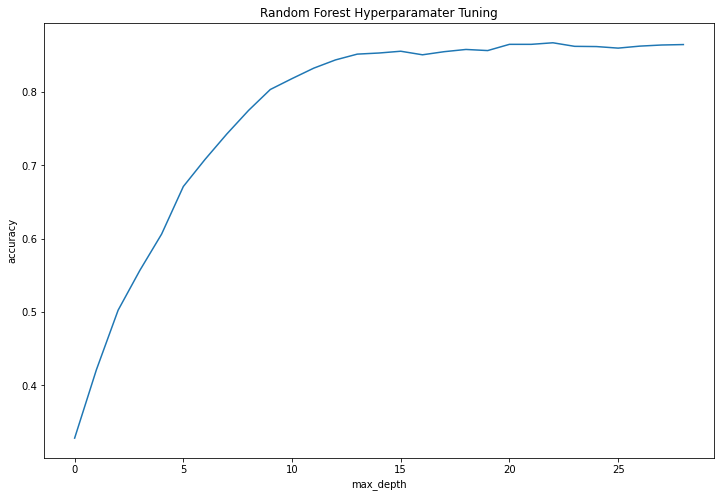

In [18]:
plt.figure(figsize=(12,8))
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("Random Forest Hyperparamater Tuning")


plt.plot(rfcACC)

In [19]:
df2 = df.drop(columns=['length','filename','label'])

In [20]:
importance_values = [(y, x) for x, y in zip(df2.columns, rfc.feature_importances_)]
importance_values_sorted = sorted(importance_values, reverse=True)

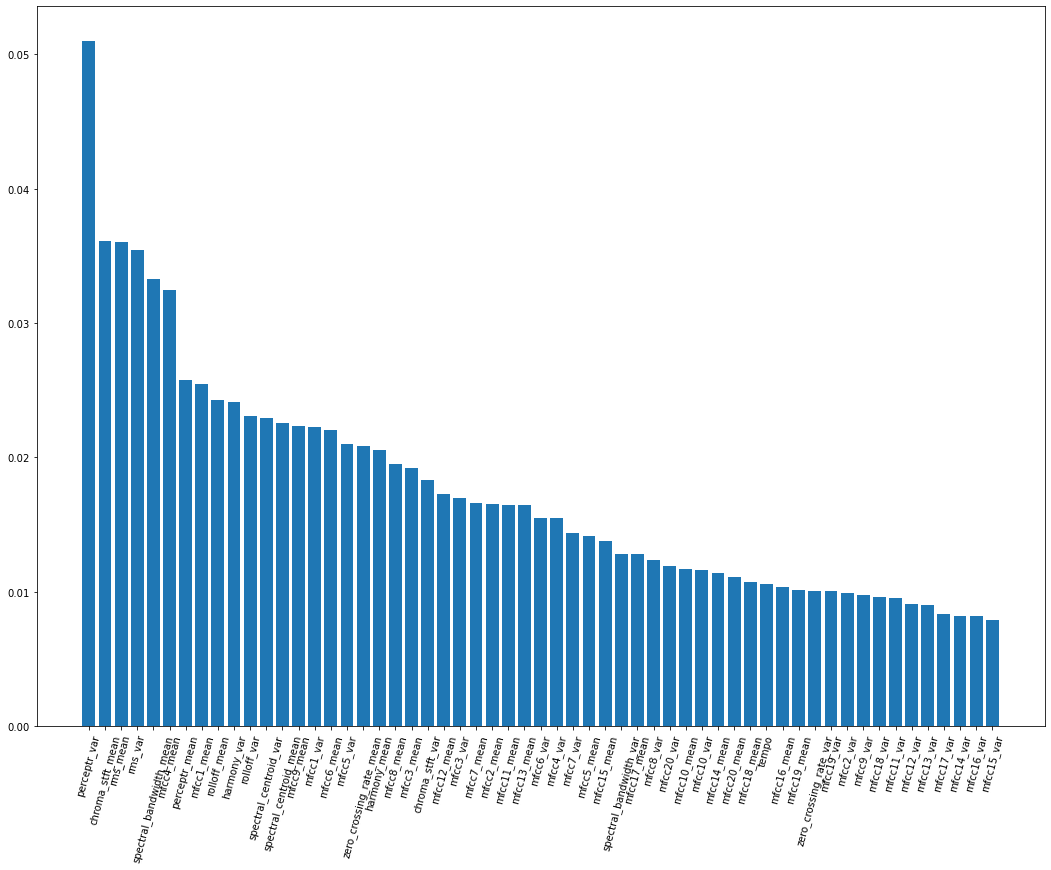

In [21]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_axes([0,0,1,1])
labels = [x[1] for x in importance_values_sorted]
importances = [x[0] for x in importance_values_sorted]
ax.bar(labels, importances)
plt.xticks(rotation = 75) 
plt.show()

In [22]:
importance_values_sorted

[(0.05101634634380436, 'perceptr_var'),
 (0.036140016872601745, 'chroma_stft_mean'),
 (0.0360391556598536, 'rms_mean'),
 (0.0354490774234737, 'rms_var'),
 (0.033283077493495315, 'spectral_bandwidth_mean'),
 (0.032486035784571855, 'mfcc4_mean'),
 (0.02577381135781667, 'perceptr_mean'),
 (0.025497003467589766, 'mfcc1_mean'),
 (0.024250498043105154, 'rolloff_mean'),
 (0.024120933808505596, 'harmony_var'),
 (0.02306500218897106, 'rolloff_var'),
 (0.0229553789797931, 'spectral_centroid_var'),
 (0.022570300740580244, 'spectral_centroid_mean'),
 (0.022332712539325214, 'mfcc9_mean'),
 (0.022274710987148432, 'mfcc1_var'),
 (0.022070471634207302, 'mfcc6_mean'),
 (0.020999228736637916, 'mfcc5_var'),
 (0.020844728172449808, 'zero_crossing_rate_mean'),
 (0.02057817344261755, 'harmony_mean'),
 (0.019551514862363107, 'mfcc8_mean'),
 (0.01920044738326522, 'mfcc3_mean'),
 (0.01834896157691514, 'chroma_stft_var'),
 (0.017299173952640568, 'mfcc12_mean'),
 (0.017014642313636117, 'mfcc3_var'),
 (0.01662712

## KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

#KNeighborsClassifier, sklearn.svm.SVC, sklearn.ensemble.RandomForestClassifier¶
 
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)



acKNN = accuracy_score(y_test, y_predKNN)
print(acKNN)


0.2948134667879891


# CNN MODEL

In [24]:
from scipy.io import wavfile
import os
basename = 'Data/genres_original'
labelslist = []
samplelist = []
ylist = []
capvalue = 660000
for root, subdirs, files in os.walk(basename):
    for filename in files:
        
        if(filename == 'jazz.00054.wav' or filename == '.DS_Store'): #TODO see why its tweaking
            pass
        else:
            file_path = os.path.join(root, filename)
#             print(file_path)
            samplerate, data = wavfile.read(file_path)
            data = data[0:capvalue]
            data = data.reshape(1,len(data))
            labelslist.append(root[21:])
            samplelist.append(data)
            
type(data)

        


numpy.ndarray

In [25]:
labelslist

['pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'pop',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',


In [28]:

# #KNeighborsClassifier, sklearn.svm.SVC, sklearn.ensemble.RandomForestClassifier¶
 
# lr = LogisticRegression(random_state=0)
# lr.fit(X_wav_train, y_wav_train)
# y_pred_wav = lr.predict(X_wav_test)



# ac = accuracy_score(y_wav_test, y_pred_wav)
# print(ac)

In [35]:
print(X_wav_train.shape)

(669, 660000)


In [36]:
from sklearn.ensemble import RandomForestClassifier

rfcACC = []

#KNeighborsClassifier, sklearn.svm.SVC, sklearn.ensemble.RandomForestClassifier¶
# for i in range(1,30)  :
rfc = RandomForestClassifier(max_depth=15, random_state=0)
rfc.fit(X_wav_train, y_wav_train)
y_predRFC = rfc.predict(X_wav_test)


acRFC = accuracy_score(y_wav_test, y_predRFC)
# rfcACC.append(acRFC)

print(acRFC)


0.2515151515151515


In [37]:
samplerate

22050

In [38]:
import tensorflow as tf

In [39]:
y_wav

array(['pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal',
       'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal',
       'metal', 'metal', 'metal', 'metal', 'metal', 'metal', 'metal',
       'metal', 'metal

In [25]:
# X_wav = np.vstack(samplelist)
# y_wav = np.array(labelslist)
from keras.utils import to_categorical
X_wav = np.load('X_wav.npy')
y_wav = np.load('y_wav.npy')
# X_wav = X_wav[:,:100000]


In [26]:
X_wav_train, X_wav_test, y_wav_train, y_wav_test = train_test_split(X_wav, y_wav, test_size=0.33, random_state=42)


In [27]:
# np.save('X_wav',X_wav)
# np.save('y_wav',y_wav)

In [28]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(y_wav)


# y_wav = le.transform(y_wav)
# # np.save('y_wav',y_wav)

# print(y_wav)

In [29]:

print(X_wav_train.shape, y_wav_train.shape)
print(X_wav_test.shape, y_wav_test.shape)

(669, 660000) (669,)
(330, 660000) (330,)


In [30]:
y_wav_train = to_categorical(y_wav_train)
y_wav_test = to_categorical(y_wav_test)

## Architecture 1

In [31]:
y_wav_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
cnn_model = tf.keras.models.Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_wav_train.shape[1],1)))
# cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
# cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
# cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
# cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
# cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_model.add(Dense(units = 10, activation='softmax'))

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 660000, 32)        128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 330000, 32)       0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10560000)          0         
                                                                 
 dense_2 (Dense)             (None, 10)                105600010 
                                                                 
Total params: 105,600,138
Trainable params: 105,600,138
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
# cnn_model.compile(optimizer='adam', loss = ' sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model_history = cnn_model.fit(X_wav_train, y_wav_train, epochs=10, batch_size = 10, validation_data = (X_wav_test, y_wav_test))

Epoch 1/10
24/67 [=========>....................] - ETA: 2:29 - loss: 6040036.5000 - accuracy: 0.0875

In [ ]:
training_loss = cnn_model_history.history['loss']
validation_loss = cnn_model_history.history['val_loss']

plt.figure(figsize=(10,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graphs')

plt.plot(range(10), training_loss, label='Training Loss', marker='o')
plt.plot(range(10), validation_loss, label='Validation Loss', marker='o')

plt.legend()

In [ ]:
#non sparse using 100000 = val_accuracy of 17.8%

## Architecture 2

In [ ]:
cnn_model = tf.keras.models.Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_wav_train.shape[1],1)))
# cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
# cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
# cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
# cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
# cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
cnn_model.add(Dense(units = 10, activation='softmax'))

cnn_model.summary()